In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy

# 회귀 ANN

1.회귀 ann 구현

2.학습과 평가용 데이터 불러오기

3.회귀 ann 학습 및 성능 평가

4.회귀 ann 학습 결과 분석

In [2]:
import matplotlib.pyplot as plt


def plot_acc(history, title=None):  #정확도를 그리는 함수
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None): #손실을 그리는 함수
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss']) # 선 그리기 #history에 들어있는 실제 학습 데이터로 구한 손실값
    plt.plot(history['val_loss'])       #학습 데이터 일부를 사용한 검증 데이터로 구한 손실값
    if title is not None:
        plt.title(title) #그래프 제목 표시
    plt.ylabel('Loss')  #X축이름표시
    plt.xlabel('Epoch') #Y축이름표시
    plt.legend(['Training', 'Verification'], loc=0) #각 라인의 표식 표시
    # plt.show()



Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 414.0023 - val_loss: 127.3267
Epoch 2/100
 - 0s - loss: 105.0846 - val_loss: 129.9288
Epoch 3/100
 - 0s - loss: 114.4886 - val_loss: 75.3878
Epoch 4/100
 - 0s - loss: 71.5204 - val_loss: 66.6286
Epoch 5/100
 - 0s - loss: 66.1982 - val_loss: 63.9125
Epoch 6/100
 - 0s - loss: 57.2722 - val_loss: 76.0105
Epoch 7/100
 - 0s - loss: 57.7392 - val_loss: 52.3094
Epoch 8/100
 - 0s - loss: 49.7941 - val_loss: 49.7655
Epoch 9/100
 - 0s - loss: 61.1977 - val_loss: 52.2886
Epoch 10/100
 - 0s - loss: 44.6859 - val_loss: 45.4550
Epoch 11/100
 - 0s - loss: 45.6337 - val_loss: 55.3813
Epoch 12/100
 - 0s - loss: 51.9755 - val_loss: 49.1175
Epoch 13/100
 - 0s - loss: 50.1750 - val_loss: 40.4117
Epoch 14/100
 - 0s - loss: 37.2695 - val_loss: 43.8325
Epoch 15/100
 - 0s - loss: 35.6705 - val_loss: 46.9930
Epoch 16/100
 - 0s - loss: 45.6255 - val_loss: 41.4976
Epoch 17/100
 - 0s - loss: 45.8990 - val_loss: 97.2824
Epoch 18/100
 - 0s - los

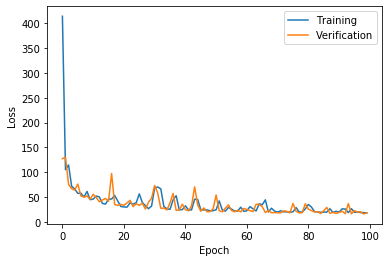

In [3]:
##############################################
# Modeling
##############################################
from keras import layers, models #툴과 계층을 합쳐 하나의 모델로 모델로 만드는 툴
from sklearn import preprocessing 


class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu') #활성화 함수도 만듬

        # Connect network elements 각 계층의 신호 연결 상황을 정의
        x = layers.Input(shape=(Nin,)) #1차원 열 벡터
        h = relu(hidden(x)) # x -> hidden -> relu -> h
        y = output(h) #활성화 함수 없이 바로 y로 나온다.
        # 원하는 값은 연속값으로 바로 예측하는 회귀에서는 통상적으로 출력노드에
        # 활성화 함수를 사용하지 않습니다.
        
        #한 번에 일괄처리되는 데이터 수를 의미하는 배치 크기는 여기서 생략함
        # 에코크 당 배치처리가 진행되는 횟수  =  전체 학습 데이터 수 / 배치 크기
        
        
        super().__init__(x, y)
        self.compile(loss='mse', optimizer='sgd')
        #하이퍼파라미터 탐색  : 사용가능한 알고리즘들을 다 바꾸어 보고
        #                  최적의 손실 성능을 보이는 알고리즘을 선택하는 방법

##############################################
# Data
##############################################
from keras import datasets
from sklearn import preprocessing


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)


##############################################
# Plotting
##############################################
import matplotlib.pyplot as plt
#from keraspp.skeras import plot_loss


##############################################
# Main
##############################################
def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()

    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

    performace_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    plot_loss(history)
    plt.show()


if __name__ == '__main__':
    main()
